In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [3]:
import pandas as pd

# Definindo o caminho para o arquivo CSV
path_train= r'Y:\ALUNOS\PRESAL2\EXOCARB\GRADUACAO\THEO COHEN\Atividades - Théo Cohen Farhat - 2023&2024\dataset\df_train.csv'
path_test= r'Y:\ALUNOS\PRESAL2\EXOCARB\GRADUACAO\THEO COHEN\Atividades - Théo Cohen Farhat - 2023&2024\dataset\df_test.csv'
# Carregando o arquivo CSV no DataFrame do pandas
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

In [4]:
# Criação do ImageDataGenerator com data augmentation e split de validação
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [5]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='Y:\ALUNOS\PRESAL2\EXOCARB\GRADUACAO\THEO COHEN\Atividades - Théo Cohen Farhat - 2023&2024\dataset\images',
    x_col='id',
    y_col='porosidade',
    target_size=(120,120),
    batch_size=32,
    class_mode='raw',
    subset='training',
    shuffle=True
)

Found 54 validated image filenames.


C:\Users\theocf\AppData\Local\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 6 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [6]:
val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='Y:\ALUNOS\PRESAL2\EXOCARB\GRADUACAO\THEO COHEN\Atividades - Théo Cohen Farhat - 2023&2024\dataset\images',
    x_col='id',
    y_col='porosidade',
    target_size=(120, 120),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    shuffle=True
)


Found 13 validated image filenames.


In [7]:
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='Y:\ALUNOS\PRESAL2\EXOCARB\GRADUACAO\THEO COHEN\Atividades - Théo Cohen Farhat - 2023&2024\dataset\images',
    x_col='id',
    y_col='porosidade',
    target_size=(120, 120),
    batch_size=32,
    class_mode='raw',
    shuffle=False
)

Found 13 validated image filenames.


C:\Users\theocf\AppData\Local\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [8]:
# Número de amostras em cada gerador
num_train_samples = train_generator.samples
num_val_samples = val_generator.samples
num_test_samples = test_generator.samples

print(f"Número de imagens para treinamento: {num_train_samples}")
print(f"Número de imagens para validacao: {num_val_samples}")
print(f"Número de imagens para teste: {num_test_samples}")

Número de imagens para treinamento: 54
Número de imagens para validacao: 13
Número de imagens para teste: 13


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(120, 120, 3)))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1, activation="linear"))

In [10]:
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
           restore_best_weights=True
        )
    ]
)

Epoch 1/100
2/2 [==============================] - 2s 896ms/step - loss: 1137086.1250 - val_loss: 129165.7422
Epoch 2/100
2/2 [==============================] - 1s 427ms/step - loss: 70441.6719 - val_loss: 1270.3002
Epoch 3/100
2/2 [==============================] - 1s 432ms/step - loss: 787.1878 - val_loss: 1353.4021
Epoch 4/100
2/2 [==============================] - 1s 527ms/step - loss: 740.5079 - val_loss: 96.4310
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 217.9726 - val_loss: 111.1820
Epoch 6/100
2/2 [==============================] - 1s 708ms/step - loss: 82.7361 - val_loss: 155.9870
Epoch 7/100
2/2 [==============================] - 1s 763ms/step - loss: 60.5826 - val_loss: 43.1770
Epoch 8/100
2/2 [==============================] - 1s 434ms/step - loss: 53.4032 - val_loss: 44.3150
Epoch 9/100
2/2 [==============================] - 1s 419ms/step - loss: 32.2661 - val_loss: 71.3807
Epoch 10/100
2/2 [==============================] - 1s 677ms/step - loss:

In [11]:
model.save('porosity_model.h5')

C:\Users\theocf\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = load_model('porosity_model.h5')

NameError: name 'load_model' is not defined

In [13]:
predicted_porosity = np.squeeze(model.predict(test_generator))
true_porosity = test_generator.labels

1/1 [==============================] - 0s 250ms/step


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calcular o erro médio absoluto e o erro quadrático médio
mae = mean_absolute_error(true_porosity, predicted_porosity)
mse = mean_squared_error(true_porosity, predicted_porosity)

print(f"Erro Medio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Medio (MSE): {mse}")

Erro Medio Absoluto (MAE): 2.559924118335431
Erro Quadrático Medio (MSE): 9.157567024607188


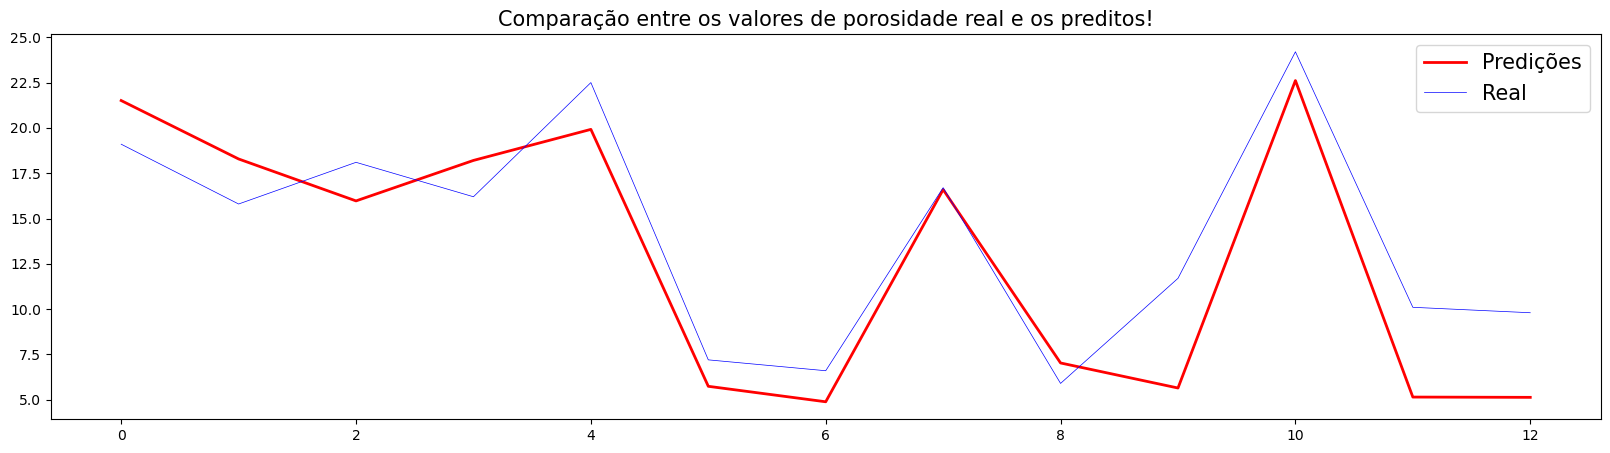

In [15]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predicted_porosity[:150], linewidth=2, color='r')
plt.plot(true_porosity[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de porosidade real e os preditos!',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

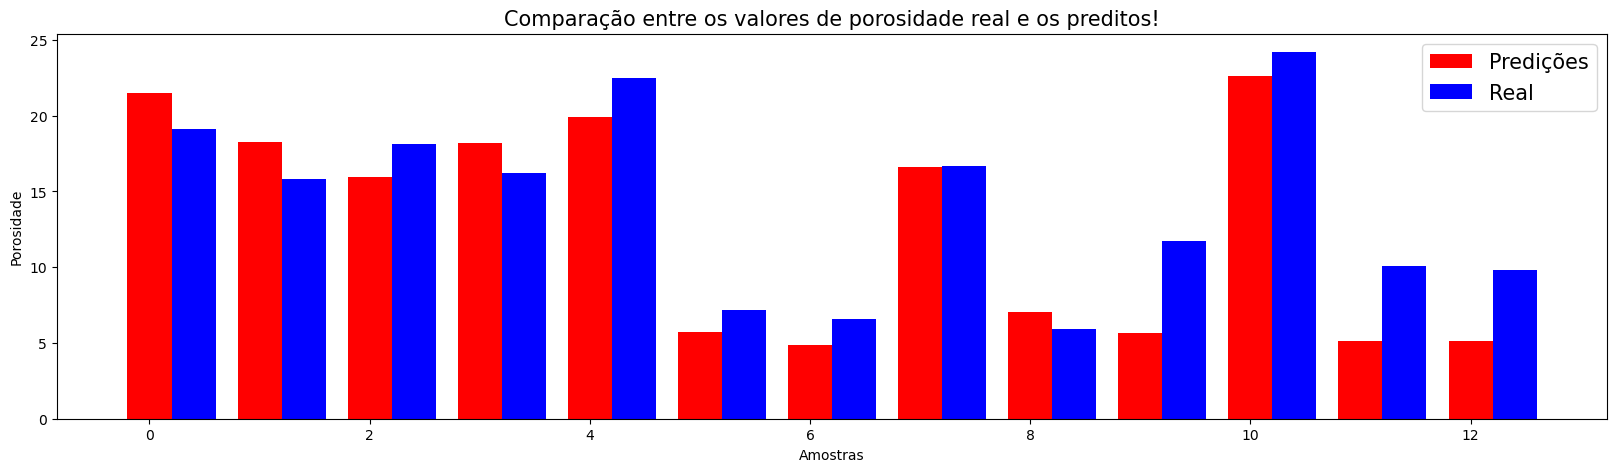

In [16]:
# Configurando o gráfico de barras
plt.figure(figsize=(20, 5))
bar_width = 0.4
indices = range(len(predicted_porosity[:150]))

# Plotando os valores preditos e reais como barras lado a lado
plt.bar(indices, predicted_porosity[:150], width=bar_width, color='r', align='center')
plt.bar([i + bar_width for i in indices], true_porosity[:150], width=bar_width, color='b', align='center')

# Ajustes no gráfico
plt.title('Comparação entre os valores de porosidade real e os preditos!', size=15)
plt.legend(['Predições', 'Real'], fontsize=15)
plt.xlabel('Amostras')
plt.ylabel('Porosidade')

# Exibindo o gráfico
plt.show()

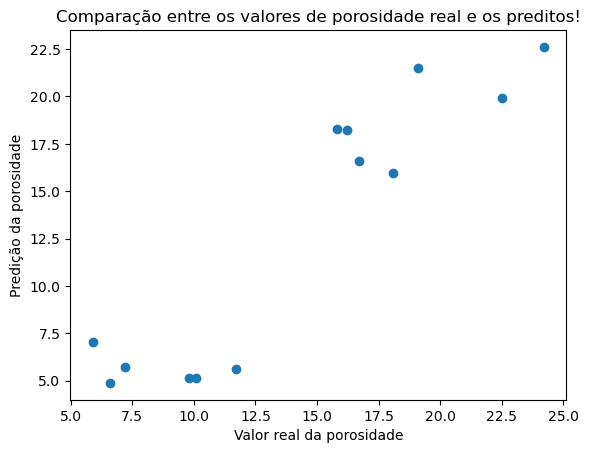

In [17]:
plt.scatter(true_porosity, predicted_porosity)
plt.xlabel('Valor real da porosidade')
plt.ylabel('Predição da porosidade')
plt.title('Comparação entre os valores de porosidade real e os preditos!')
plt.show()

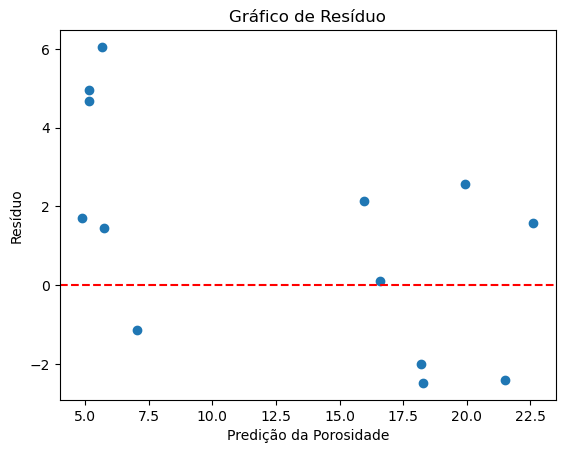

In [18]:
residuals = true_porosity - predicted_porosity
plt.scatter(predicted_porosity, residuals)
plt.xlabel('Predição da Porosidade')
plt.ylabel('Resíduo')
plt.title('Gráfico de Resíduo')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

def load(image_path):

    image = image_utils.load_img(image_path, color_mode="rgb", target_size=(120, 120))

    return image

In [20]:
def predict_image(file_path, model):
    show_image(file_path)
    image = load(file_path)
    image = image_utils.img_to_array(image)
    #plt.imshow(image, cmap='gray')
    image = image.reshape(1, 120, 120, 3)
    prediction = model.predict(image)


    return prediction

1/1 [==============================] - 0s 14ms/step


array([[5.4557676]], dtype=float32)

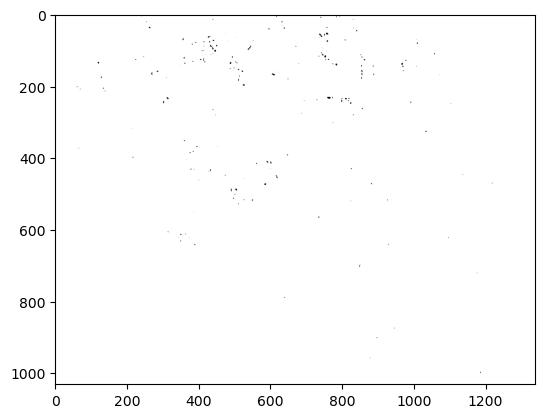

In [22]:
predict_image( "928_5044.70_bi.png", model)